# Аналитика сервиса аренды самокатов GoFast

**Описание проекта**

В данном проекте необходимо проанализировать данные сервиса аренды самокатов GoFast и проверить гипотезы, которые могут помочь бизнесу развиваться.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки:
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra:
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

**Цель проекта**

Целью данного проекта является анализ данных сервиса GoFast и оценка полученных результатов для роста бизнеса. Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов. Необходимо будет сформировать гипотезы и ответить на следующие вопросы:

1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

**Описание данных**
Данные состоят из трех выборок, в которых содержится информация о пользователях, их поездках и подписках.

**Пользователи — users_go.csv**
- `user_id` - уникальный идентификатор пользователя
- `name` - имя пользователя
- `age` - возраст
- `city` - город
- `subscription_type` - тип подписки (free, ultra)

**Поездки — rides_go.csv**
- `user_id` - уникальный идентификатор пользователя
- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` - дата совершения поездки

**Подписки — subscriptions_go.csv**
- `subscription_type` - тип подписки
- `minute_price` - стоимость одной минуты поездки по данной подписке
- `start_ride_price` - стоимость начала поездки
- `subscription_fee` - стоимость ежемесячного платежа

**План работ**

1. Провести предварительный обзор данных
2. Провести предобработку данных
3. Провести исследовательский анализ данных, визуализировать данные, возможно, найти некоторые закономерности
4. Подсчитать выручку предприятия от каждого клиента
5. Доказать или опровергнуть выдвинутые гипотезы и овтетить на поставленные выше вопросы
6. Сделать общий вывод


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

Предварительно проверим данные внешне и на наличие пропусков.

##### Выборка `users_go`

In [3]:
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
users_go.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


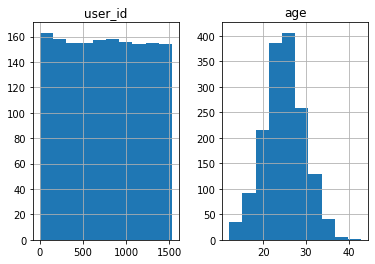

In [6]:
users_go.hist();

##### Выборка `rides_go`

In [7]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
rides_go.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


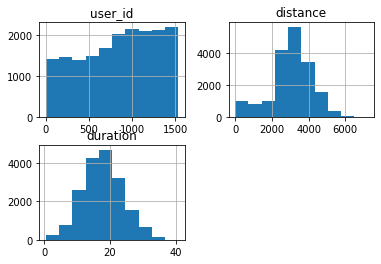

In [10]:
rides_go.hist();

##### Выборка `subscriptions_go`

In [11]:
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [12]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [13]:
subscriptions_go.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


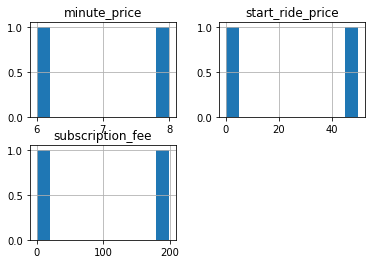

In [14]:
subscriptions_go.hist();

Явных пропусков в датафреймах не обнаружено, данные можно считать пригодными для исследования. Необходимо провести предобработку данных следующими шагами:
- Изменить тип данных в необходимых столбцах;
- Проверить датафрейм на дубликаты;
- Проверить датафрейм на выбросы.

#### Шаг 2. Предобработка данных

#####  Предобработка `users_go`

In [15]:
# Проверим выборку users_go на наличие явных дубликатов
users_go.duplicated().sum()

31

In [16]:
# Удалим янвые дубликаты и проверим удаление
users_go.drop_duplicates(inplace=True)
users_go.duplicated().sum()

0

In [17]:
# Для экономии памяти преобразуем тип столбца age в uint8, возраст ведь не будет больше 256
users_go['age'] = users_go['age'].astype('uint8')

##### Предобработка `rides_go`

In [18]:
#Проверим выборку rides_go на наличие явных дубликатов
rides_go.duplicated().sum()

0

In [19]:
# Округлим столбцы distance и duration до 2 знаков после запятой для удобства работы
rides_go['distance'] = rides_go['distance'].round(2)
rides_go['duration'] = rides_go['duration'].round(2)

In [20]:
# Приведем столбец date к формату datetime для удобства работы и экономии ресурсов и добавим столбец month для работы
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')
rides_go['month'] = rides_go['date'].dt.month

In [21]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [22]:
rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.92,25.60,2021-01-01,1
1,1,2617.59,15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,2694.78,18.51,2021-08-11,8
4,1,4028.69,26.27,2021-08-28,8


##### Предобработка `subscriptions_go` 

Предоботка данного датафрейма не требуется, так как его весь мы уже увидели на первом этапе. В нем все в соответствии с исходными данными.

##### Вывод

Во время предобработки данных были выполенны следующие шаги:
1. Выборка `users_go`:
    - Удалены дубликаты;
    - Изменен тип данных в столбце `age`.
2. Выборка `rides_go`:
    - Округлены значения столбцов `distance` и `duration`;
    - Столбец `date` приведен к типу datetime;
    - Добавлен столбец `month` на основе столбца `date`.
3. Выборка `subscriptions_go`:
    - Предобработка не потребовалась.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

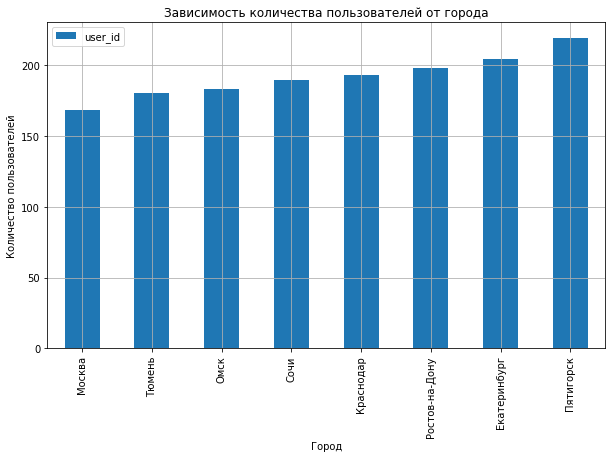

In [23]:
(
    users_go.pivot_table(index='city', values='user_id', aggfunc='count')
    .sort_values(by='user_id', ascending=True)
    .plot(kind='bar', grid=True, figsize=(10,6))
)

plt.title('Зависимость количества пользователей от города')
plt.xlabel('Город')
plt.ylabel('Количество пользователей');

In [24]:
users_go['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

**Вывод**

Представление данных количества пользователей по городам позволяет заметить, что наибольшее количество пользователей находится в городе Пятигорск, а наименьшее - в Москве. Причем на втором месте находится Екатеринбург, а затем идут южные города.

##### Соотношение пользователей с подпиской и без подписки

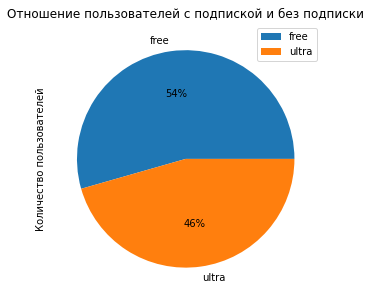

In [25]:
(
    users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot.pie(y='user_id', figsize=(10,5), label='Количество пользователей', autopct='%1.0f%%')
)

plt.title('Отношение пользователей с подпиской и без подписки');

**Вывод**

По графику можно заметить, что количество пользователей без подписки 54% превышает количество пользователей с подпиской 46% на 8%`.

##### Возраст пользователей

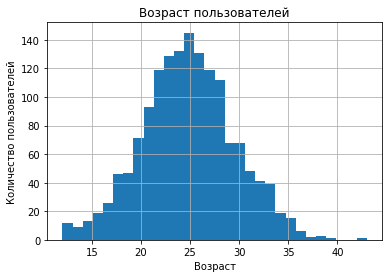

In [26]:
plt.hist(users_go['age'], bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [27]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Вывод**

По полученной гистграмме можно заметить, что распределение возраста подчиняется номральному распределению со средним примерно 25 лет. Самый маленький возраст - это 12 лет, самый большой - 43 года.

##### Расстояние, которое пользователь преодолел за одну поездку

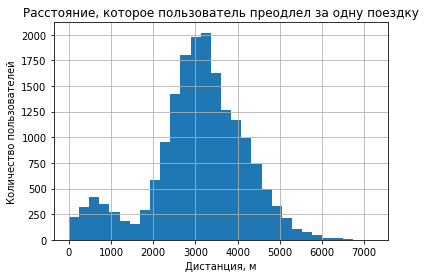

In [28]:
plt.hist(rides_go['distance'], bins = 30)
plt.title('Расстояние, которое пользователь преодлел за одну поездку')
plt.xlabel('Дистанция, м')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [29]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

**Вывод**

Исходя из постренных графиков и найденных результатов, можно заметить, что гситграмма дистанции имеет два пика: примерно на 600 метрах и на среднем 3100 м. Вероятно, пользователи, которые берут самокат на 600 метров, едут до другого вида транспорта (метро, автобус и т.п.), когда это нужно сделать быстро. А те, кто берут самокат на 3 км, возиожно, добираются там, где обычного транспорта нет или он не так эффективен.

##### Продолжительность поездок

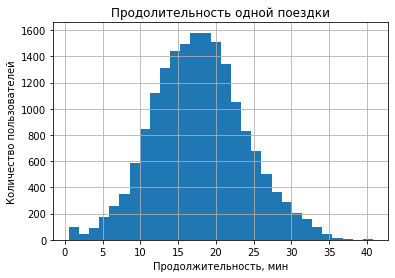

In [30]:
plt.hist(rides_go['duration'], bins = 30)
plt.title('Продолительность одной поездки')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

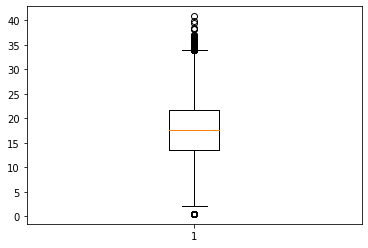

In [31]:
plt.boxplot(rides_go['duration']);

In [32]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805017
std          6.091071
min          0.500000
25%         13.600000
50%         17.680000
75%         21.722500
max         40.820000
Name: duration, dtype: float64

**Вывод**

Большая часть длится от 13 минут(1 квартиль) до 22 минут(2 квартиль), со средним в 18 минут. При этом имеется вброс на 0.5 минут, он один, вероятно, это вызвано тем, что человек резко передумал, потому  что в случае технического сбоя, таких значений было бы больше.

##### Вывод

По исследовательскому анализу можно сделать следующие выводы:
1. Наибольшее количество пользователей находится в городе Пятигорск, а наименьшее - в Москве. Причем на втором месте находится Екатеринбург, а затем идут южные города.
2. Количество пользователей без подписки 54% превышает количество пользователей с подпиской 46% на 8%`.
3. По полученной гистграмме можно заметить, что распределение возраста подчиняется номральному распределению со средним примерно 25 лет. Самый маленький возраст - это 12 лет, самый большой - 43 года.
4. Исходя из постренных графиков и найденных результатов, можно заметить, что гистграмма дистанции имеет два пика: примерно на 600 метрах и на среднем 3100 м. Вероятно, пользователи, которые берут самокат на 600 метров, едут до другого вида транспорта (метро, автобус и т.п.), когда это нужно сделать быстро. А те, кто берут самокат на 3 км, возиожно, добираются там, где обычного транспорта нет или он не так эффективен.
5. Большая часть поездок длится от 13 минут(1 квартиль) до 22 минут(2 квартиль), со средним в 18 минут. При этом имеется вброс на 0.5 минут, он один, вероятно, это вызвано тем, что человек резко передумал, потому  что в случае технического сбоя, таких значений было бы больше.

#### Шаг 4. Объединение данных

##### Объединение данных о пользователях в один датафрейм

In [33]:
data = pd.merge(users_go, rides_go, on='user_id')
data = pd.merge(data, subscriptions_go, on='subscription_type')
data.head(30)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,16.65,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,14.93,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,23.12,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,15.24,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,15.04,2021-11-22,11,6,0,199


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  uint8         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3), uint8(1)
memory usage: 1.7+ MB


**Вывод**

Полученный датафрейм имеет 18068 строк, как в датафрейме с поездками, пропуски отсутствуют, следовательно, объединение можно считать успешным.

##### Создание дополнительных датафреймов на основе общего

###### Датафрейм с данными о пользователях без подписки

In [35]:
data_free = data[data['subscription_type'] == 'free']
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.94,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.02,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.78,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.43,2021-02-14,2,8,50,0


Датафрейм с данными о пользователях с подпиской

In [36]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199


##### Визуализация данных для обеих категорий

###### Продолжительность поездки для различных категорий

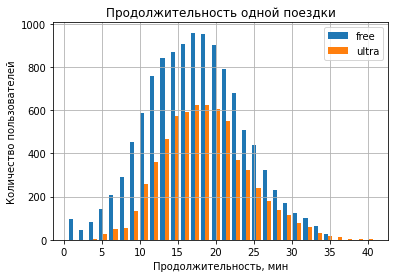

In [37]:
plt.hist([data_free['duration'], data_ultra['duration']], bins = 30, label=['free', 'ultra'])
plt.title('Продолжительность одной поездки')
plt.legend(loc='upper right')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [38]:
data_free['duration'].describe()

count    11568.000000
mean        17.390900
std          6.326821
min          0.500000
25%         12.960000
50%         17.330000
75%         21.592500
max         34.950000
Name: duration, dtype: float64

In [39]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.542017
std         5.572065
min         3.760000
25%        14.527500
50%        18.180000
75%        21.880000
max        40.820000
Name: duration, dtype: float64

###### Дистанция для различных категорий

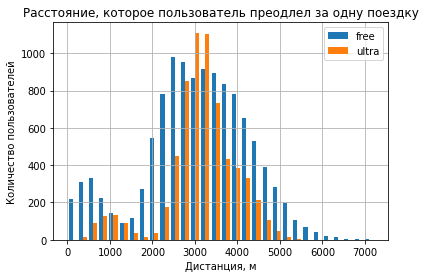

In [40]:
plt.hist([data_free['distance'], data_ultra['distance']], bins = 30, label=['free', 'ultra'])
plt.title('Расстояние, которое пользователь преодлел за одну поездку')
plt.legend(loc='upper right')
plt.xlabel('Дистанция, м')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [41]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

In [42]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

##### Вывод

С помощью объединения датафреймов в общий, стало возможным оценить оценить разницу в дистанции и продолжительности поездок в поведении различных категорий подписок (`free` и `ultra`). На основании построенных графиков можно сделать следующие выводы:
- Наличие подписки влияет на длительность поездки
    - Среднее значение длительности поездки у людей с подпиской равно 18.5, а у людей без подписки - 17.4, можно также заметить что на графике длительности поездки распределение людей с подпиской смещено вправо в сторону больших значений. Максимальное значение длительности поездки больше у людей с подпиской.
- Наличие подписки влияет на дистанцию поездки
    - Среднее значение дистанции незначительно больше у людей с подпиской, нежели без подписки, но при этом стандартное отклонение у людей с подпиской гораздо меньше. Распределение по дистанции у людей с подпиской больше тяготится к медианному значению (3.1 км), в то время как у людей без подписки большой разброс, предположительно, это вызвано тем, что люди только пробуют использование самокатов, поэтому поздки или длинные или короткие.

#### Шаг 5. Подсчёт выручки

##### Создание датафрейма с агрегированными данными

In [43]:
#Округлим длительность
data['duration'] = np.ceil(data['duration'])

#Создадим сводную таблицу
users_income = data.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration',
        'name',
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=({'distance': 'sum', 
             'duration':'sum',
             'name': 'count',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)

#Заменим название столбца name, по которому мы считали количество поездок
users_income.rename(columns = {'name' : 'count_trips'}, inplace = True)

#users_income['duration'] = np.ceil(users_income['duration'])
users_income.head(10)

distance  duration  minute_price  count_trips  \
user_id month                                                  
1       1       7027.51      42.0             6            2   
        4        754.16       7.0             6            1   
        8       6723.47      46.0             6            2   
        10      5809.91      32.0             6            2   
        11      7003.50      56.0             6            3   
        12      6751.63      28.0             6            2   
2       3      10187.73      63.0             6            3   
        4       6164.39      40.0             6            2   
        6       3255.34      14.0             6            1   
        7       6780.73      48.0             6            2   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199  
        12                    0               199  
2       3                     0               199  
        4                     0               199  
        6                     0               199  
        7                     0               199

In [44]:
users_income

distance  duration  minute_price  count_trips  \
user_id month                                                  
1       1       7027.51      42.0             6            2   
        4        754.16       7.0             6            1   
        8       6723.47      46.0             6            2   
        10      5809.91      32.0             6            2   
        11      7003.50      56.0             6            3   
...                 ...       ...           ...          ...   
1534    6       3409.47      26.0             8            2   
        8       7622.45      48.0             8            2   
        9       4928.17      23.0             8            1   
        11     13350.02      78.0             8            4   
        12      2371.71      16.0             8            1   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199  
...                         ...               ...  
1534    6                    50                 0  
        8                    50                 0  
        9                    50                 0  
        11                   50                 0  
        12                   50                 0  

[11331 rows x 6 columns]

##### Добавление столбца с выручкой

In [45]:
users_income['income'] = (users_income['start_ride_price'] * users_income['count_trips']
                          + users_income['duration'] * users_income['minute_price'] 
                          + users_income['subscription_fee'])
users_income.head()
print ('Выручка за год составила:', users_income['income'].sum(), 'руб.')

Выручка за год составила: 3877893.0 руб.


##### Вывод

В результате данного этапа был создан новый датафрейм с подсчетом выручки каждого клиента за месяц. Выручка за год составила 3853193 рубля.

#### Шаг 6. Проверка гипотез

##### Гипотеза 1. Тратят ли пользователи с подпиской больше времени на поездки?

В шаге 4 мы только визуально могли оценить разницу между длительностью поездки в разных категориях. Сейчас же мы можем создать гипотезы, которые мы сможем доказать или опровергнуть.

Сформируем следующие гпиотезы:
   - H0: Средняя продолжительность поездок с подпиской `ultra` **равна** средней продолжительности поездок без подписки `free`.
   - H1: Средняя продолжительность поездок с подпиской `ultra` **больше** средней продолжительности поездок без подписки `free`.
   
Уровень статистической значимости примем 5%.

In [46]:
alpha = 0.05

results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'], 
    alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.274138957151199e-34
Отвергаем нулевую гипотезу


**Вывод**

Нулевую гипотезы мы отвергли, поэтому мы можем убедиться в том, что у клиентов с подпиской больше средняя продолжительность поездок.

##### Гипотеза 2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Поскольку считается, что расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката, выдвинем гипотезу для различных подписок и докажем или опровергнем ее.

Сформируем следующие гпиотезы:
   - H0: Средняя дистанция поездки с подпиской `ultra` **равна** 3130 метрам.
   - H1: Средняя дистанция поездки с подпиской `ultra` **больше** 3130 метров.
   
Уровень статистической значимости примем 5%.

In [47]:
alpha = 0.05
distance = 3130

results = st.ttest_1samp(
    data_ultra['distance'], 
    distance,
    alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Поскольку нулевую гипотезу отвергнуть не удалось и при таком большом p-value мы можем утверждать, что средняя дистанция с подпиской не превышает 3130 метров, что позволяет самокату не изнашиваться раньше времени.

##### Гипотеза 3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Необходимо понять, являются ли клиенты с подпиской более прибыльными или нет.

Сформируем следующие гпиотезы:
   - H0: Средняя выручка от клиентов с подпиской `ultra` **равна** средней выручке от клиентов без подписки `free`.
   - H1: Средняя выручка от клиентов с подпиской `ultra` **больше** средней выручки от клиентов без подписки `free`.
   
Уровень статтистической значимости примем 5%.

In [48]:
alpha = 0.05
users_income_ultra = users_income.loc[users_income.subscription_fee > 0, 'income'] 
users_income_free = users_income.loc[users_income.subscription_fee == 0, 'income'] 

results = st.ttest_ind(users_income_ultra, 
                       users_income_free,
                       alternative = 'greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.8164914860049708e-31
Отвергаем нулевую гипотезу


**Вывод**

Поскольку нулевую гипотезу мы отвергли, следовательно, мы можем утверждать, что выручка от клиентов с подпиской выше, чем от клиетнов без подписки.

##### Гипотеза 4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Количество обращений в техподдержку до обновления и после являются зависимыми, потому что в них переменная количества обращений измеряется дважды для определенных пользователей. Для решения этой задачи гипотезы будут следующие:
   - H0: Среднее количество обращений после обновления **равно** среднему количеству обращений до обновления.
   - H1: Среднее количество обращений после обновления **меньше** среднего количества обращений до обновления.
   
Для опровержения или доказательства данных гипотез необходим метод scypy.stat.ttest.rel().

#### Общий вывод

В ходе проведенного исследования был проделан следующий ряд работ и сделаны следующие выводы:

1. Открыты и изучены файл
    - Файл с информацией о пользователях `users_go` имеет 1565 записей;
    - Файл с информацией о поездках `rides_go` имеет 18068 записей;
    - Файл с информацией о подписках `subscriptions_go` имеет 2 записи;
    - Данные были признаны поллными и пригодными для исследования.
2. Проведена предобработка данных:
    - Выборка `users_go`:
        - Удалены дубликаты;
        - Изменен тип данных в столбце `age`.
    - Выборка `rides_go`:
        - Округлены значения столбцов `distance` и `duration`;
        - Столбец `date` приведен к типу datetime;
        - Добавлен столбец `month` на основе столбца `date`.
    - Выборка `subscriptions_go`:
        - Предобработка не потребовалась.

3. Проведен исследовательский анализ данных:
    - Наибольшее количество пользователей находится в городе Пятигорск, а наименьшее - в Москве. Причем на втором месте находится Екатеринбург, а затем идут южные города.
    - Количество пользователей без подписки 54% превышает количество пользователей с подпиской 46% на 8%`.
    - По полученной гистграмме можно заметить, что распределение возраста подчиняется номральному распределению со средним примерно 25 лет. Самый маленький возраст - это 12 лет, самый большой - 43 года.
    - Исходя из постренных графиков и найденных результатов, можно заметить, что гистграмма дистанции имеет два пика: примерно на 600 метрах и на среднем 3100 м. Вероятно, пользователи, которые берут самокат на 600 метров, едут до другого вида транспорта (метро, автобус и т.п.), когда это нужно сделать быстро. А те, кто берут самокат на 3 км, возиожно, добираются там, где обычного транспорта нет или он не так эффективен.
    - Большая часть поездок длится от 13 минут(1 квартиль) до 22 минут(2 квартиль), со средним в 18 минут. При этом имеется вброс на 0.5 минут, он один, вероятно, это вызвано тем, что человек резко передумал, потому  что в случае технического сбоя, таких значений было бы больше.
4. Проведено объединение датафреймов, на основании чего сделаны следующие выводы:
    - Наличие подписки влияет на длительность поездки
        - Среднее значение длительности поездки у людей с подпиской равно 18.5, а у людей без подписки - 17.4, можно также заметить что на графике длительности поездки распределение людей с подпиской смещено вправо в сторону больших значений. Максимальное значение длительности поездки больше у людей с подпиской.
    - Наличие подписки влияет на дистанцию поездки
        - Среднее значение дистанции незначительно больше у людей с подпиской, нежели без подписки, но при этом стандартное отклонение у людей с подпиской гораздо меньше. Распределение по дистанции у людей с подпиской больше тяготится к медианному значению (3.1 км), в то время как у людей без подписки большой разброс, предположительно, это вызвано тем, что люди только пробуют использование самокатов, поэтому поздки или длинные или короткие.
5. Проведен подсчет выручки:
    - Был создан новый датафрейм с подсчетом выручки каждого клиента за месяц. Выручка за год составила 3853193 рубля.
6. Выдвинуты и доказаны гипотезы о параметрах датафрейма:
    -  У клиентов с подпиской больше средняя продолжительность поездок;
    - Средняя дистанция с подпиской не превышает оптимального расстояния в 3130 метров;
    - Выручка от клиентов с подпиской выше, чем от клиетнов без подписки.
7. Итоговый вывод:
    - Пользователи с подпиской являются более выгодными для компании, поэтому продакт-менеджеры могут предпринимать шаги в этом направлении.